In [2]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [3]:
train_dir = "data/"



In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.5],
                                         validation_split = 0.2

                                  )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

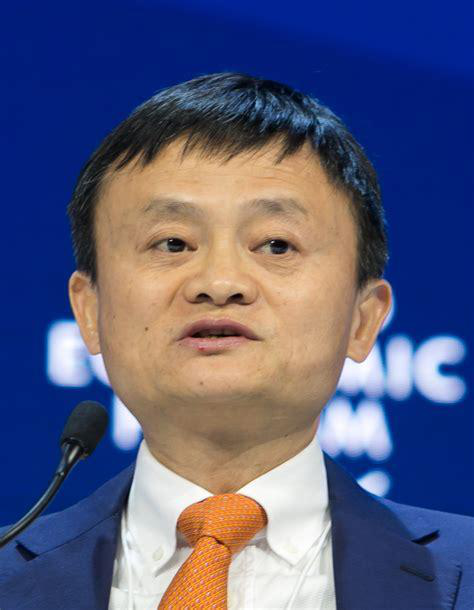

In [7]:
from PIL import Image 

im = Image.open(r"data/jack/jack0.jpg")  
  
im

In [8]:
im.size

(474, 610)

In [20]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (100,100),
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training",
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (100,100),
                                                              
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 558 images belonging to 5 classes.
Found 136 images belonging to 5 classes.


In [21]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(512,activation = 'relu'))

model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 128)      

In [23]:
history = model.fit_generator(train_generator,epochs = 50,validation_data = validation_generator)


Epoch 1/50
18/18 [==============================] - 38s 2s/step - loss: 3.5245 - accuracy: 0.2589 - val_loss: 1.6264 - val_accuracy: 0.1985
Epoch 2/50
18/18 [==============================] - 37s 2s/step - loss: 1.9565 - accuracy: 0.3238 - val_loss: 1.6559 - val_accuracy: 0.1838
Epoch 3/50
18/18 [==============================] - 37s 2s/step - loss: 1.6458 - accuracy: 0.3336 - val_loss: 1.7643 - val_accuracy: 0.1985
Epoch 4/50
18/18 [==============================] - 36s 2s/step - loss: 1.5135 - accuracy: 0.3640 - val_loss: 1.8044 - val_accuracy: 0.2059
Epoch 5/50
18/18 [==============================] - 36s 2s/step - loss: 1.3809 - accuracy: 0.4428 - val_loss: 2.0472 - val_accuracy: 0.2059
Epoch 6/50
18/18 [==============================] - 39s 2s/step - loss: 1.3099 - accuracy: 0.5127 - val_loss: 2.3583 - val_accuracy: 0.2059
Epoch 7/50
18/18 [==============================] - 42s 2s/step - loss: 1.3119 - accuracy: 0.4562 - val_loss: 2.3473 - val_accuracy: 0.2059
Epoch 8/50
18/18 [==

In [24]:
model.save('attendance.h5')


In [26]:
label_dict = {0:'Bill Gates',1:'Jack Ma',2:'Modi',3:'Elon Musk',4:'Donald Trump'}


(100, 100)
[[0.7254902  0.72156863 0.7254902  ... 0.67843137 0.67058824 0.67058824]
 [0.71764706 0.71764706 0.7254902  ... 0.66666667 0.6745098  0.6627451 ]
 [0.73333333 0.7372549  0.72941176 ... 0.67058824 0.66666667 0.66666667]
 ...
 [1.         1.         1.         ... 0.05882353 0.0627451  0.77647059]
 [1.         1.         1.         ... 0.05490196 0.05098039 0.83137255]
 [1.         1.         1.         ... 0.03921569 0.02745098 0.76862745]]
[0.0063399565, 0.09606934, 0.004905881, 0.89243996, 0.00024486188]
Elon Musk


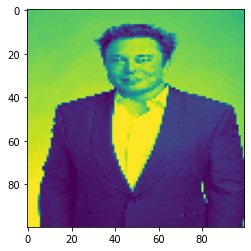

In [44]:
img = image.load_img("data/musk/musk1.jpg",target_size = (100,100),color_mode = "grayscale")
img = np.array(img)/255
plt.imshow(img)
print(img.shape)
print(img)
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,100,100,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])


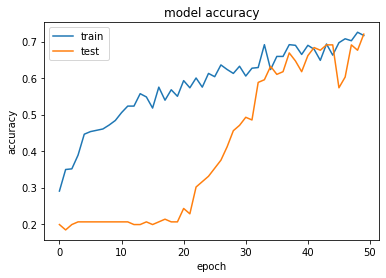

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

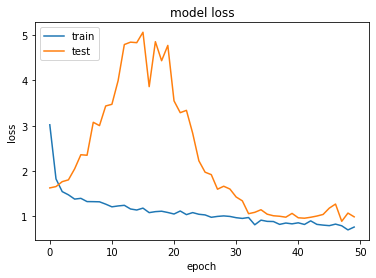

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()